In [1]:
# !pip install transformers datasets evaluate
# !pip install numpy pandas scikit-learn matplotlib
# !pip install huggingface_hub
# !pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Fou

In [2]:
from datasets import list_datasets
all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

<ipython-input-2-ebd4af12d647>:2: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


There are 184194 datasets currently available on the Hub
The first 10 are: ['amirveyseh/acronym_identification', 'ade-benchmark-corpus/ade_corpus_v2', 'UCLNLP/adversarial_qa', 'Yale-LILY/aeslc', 'nwu-ctext/afrikaans_ner_corpus', 'fancyzhx/ag_news', 'allenai/ai2_arc', 'google/air_dialogue', 'komari6/ajgt_twitter_ar', 'legacy-datasets/allegro_reviews']


In [3]:
# Dataset object behaves like python list or array
from datasets import load_dataset
emotions = load_dataset('emotion')

The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [4]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train_ds  = emotions['train']
test_ds  = emotions['test']
val_ds  = emotions['validation']

In [6]:
print(len(train_ds))

16000


In [7]:
train_ds[0],train_ds[1]

({'text': 'i didnt feel humiliated', 'label': 0},
 {'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'label': 0})

In [8]:
train_ds.column_names

['text', 'label']

In [9]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [10]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [11]:
## Saving huggingface dataset to a csv file
dataset_url = 'https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt'
emotions_local = load_dataset("csv",data_files=dataset_url,sep=';',names=['text','label'])

Generating train split: 0 examples [00:00, ? examples/s]

In [12]:
emotions_local

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
})

In [13]:
emotions['train'].features['label']

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

In [14]:
import pandas as pd
emotions.set_format(type="pandas")
df = emotions["train"][:]
print(df.shape)
df.head()

(16000, 2)


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [15]:
def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


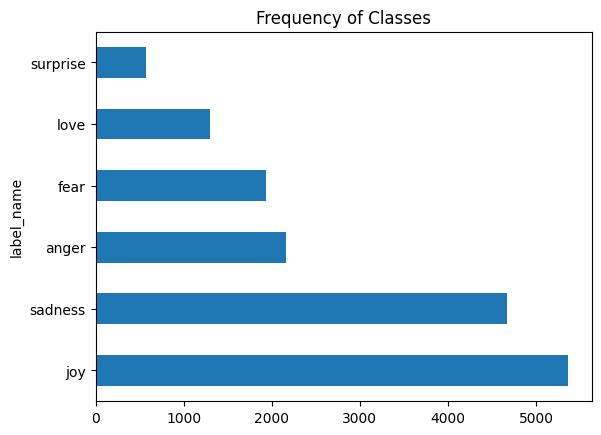

In [16]:
import matplotlib.pyplot as plt
df['label_name'].value_counts().plot.barh()
plt.title("Frequency of Classes")
plt.show()

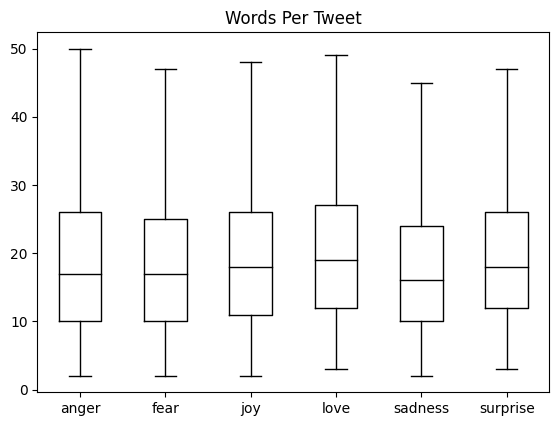

In [17]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,
          showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [18]:
emotions.reset_format()

## Text to Tokens

### Character Tokenization

In [19]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [20]:
token2idx = {ch:idx for idx,ch in enumerate(set(sorted(tokenized_text)))}
print(token2idx)

{'.': 0, 's': 1, 'c': 2, 'a': 3, 'n': 4, 'x': 5, 'z': 6, 'L': 7, 'N': 8, 't': 9, 'o': 10, 'P': 11, ' ': 12, 'e': 13, 'f': 14, 'r': 15, 'k': 16, 'g': 17, 'T': 18, 'i': 19}


In [21]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[18, 10, 16, 13, 4, 19, 6, 19, 4, 17, 12, 9, 13, 5, 9, 12, 19, 1, 12, 3, 12, 2, 10, 15, 13, 12, 9, 3, 1, 16, 12, 10, 14, 12, 8, 7, 11, 0]


In [22]:
pd.get_dummies(df['label_name'],dtype=int)

,anger,fear,joy,love,sadness,surprise
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
15995,0,0,0,0,1,0
15996,0,0,0,0,1,0
15997,0,0,1,0,0,0
15998,1,0,0,0,0,0


In [23]:
import torch
import torch.nn.functional as F
input_ids = torch.tensor(input_ids)
one_hot_enncodings = F.one_hot(input_ids,num_classes=len(token2idx))
one_hot_enncodings.shape

torch.Size([38, 20])

In [24]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_enncodings[0]}")

Token: T
Tensor index: 18
One-hot: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])


### Word Tokenization

In [25]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


### Subword Tokenization

In [26]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [27]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [28]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text['input_ids'])
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [29]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [30]:
tokenizer.vocab_size,tokenizer.model_max_length

(30522, 512)

In [31]:
for idx,(token,id) in enumerate(tokenizer.vocab.items()):
    print(f"{token} : {id}")
    if idx == 10:
        break

master : 3040
エ : 1698
gunn : 22079
##橋 : 30411
##chaft : 29043
indie : 10271
ejected : 22607
scent : 6518
##bled : 23242
employees : 5126
exploring : 11131


In [32]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [33]:
def tokenize(batch):
    return tokenizer(batch['text'],padding=True,truncation=True)

In [34]:
print(emotions["train"][:2])
print(tokenize(emotions["train"][:2]))

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'], 'label': [0, 0]}
{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [35]:
emotions_encoded = emotions.map(tokenize,batched=True,batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [36]:
print(emotions_encoded['train'].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [37]:
import sys
import platform
import torch
import pandas as pd
import sklearn as sk

has_gpu = torch.cuda.is_available()
has_mps = torch.backends.mps.is_built()
device = torch.device("mps" if has_mps else "cuda" if torch.cuda.is_available() else "cpu")

print(f"Python Platform: {platform.platform()}")
print(f"PyTorch Version: {torch.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("NVIDIA/CUDA GPU is", "available" if has_gpu else "NOT AVAILABLE")
print("MPS (Apple Metal) is", "AVAILABLE" if has_mps else "NOT AVAILABLE")
print(f"Target device is {device}")

Python Platform: Linux-6.1.85+-x86_64-with-glibc2.35
PyTorch Version: 2.3.1+cu121

Python 3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]
Pandas 2.0.3
Scikit-Learn 1.3.2
NVIDIA/CUDA GPU is available
MPS (Apple Metal) is NOT AVAILABLE
Target device is cuda


## Building a classifier

In [38]:
from transformers import AutoModel
model_ckpt = "distilbert-base-uncased"
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [39]:
text = "It's been raining from this morning."
inputs = tokenizer(text,return_tensors="pt")
print(f"Input tensor shape : {inputs['input_ids'].size()}")

Input tensor shape : torch.Size([1, 11])


In [40]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[ 0.0484, -0.0645,  0.0007,  ...,  0.0601,  0.4668,  0.3709],
         [ 0.3564, -0.0908, -0.0247,  ...,  0.0068,  0.5767,  0.0762],
         [ 0.6367, -0.2457,  0.3135,  ..., -0.2396,  0.3773, -0.0657],
         ...,
         [ 0.2091, -0.2097, -0.1204,  ..., -0.1956,  0.1588, -0.3670],
         [ 0.6154, -0.0978, -0.5679,  ...,  0.0654, -0.1501, -0.5465],
         [ 0.4871,  0.2663, -0.0357,  ..., -0.0545, -0.0150, -0.3356]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [41]:
outputs.last_hidden_state.size()

torch.Size([1, 11, 768])

In [42]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [43]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return {"hidden_state" : last_hidden_state[:,0].cpu().numpy()}

In [44]:
emotions_encoded.set_format("torch",columns=['input_ids','attention_mask','label'])

In [45]:
emotions_hidden = emotions_encoded.map(extract_hidden_states,batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [46]:
emotions_hidden['train'].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [47]:
import numpy as np
X_train = np.array(emotions_hidden['train']['hidden_state'])
X_val = np.array(emotions_hidden['validation']['hidden_state'])

y_train = np.array(emotions_hidden['train']['label'])
y_val = np.array(emotions_hidden['validation']['label'])
print(X_train.shape,X_val.shape)

(16000, 768) (2000, 768)


In [48]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components=2,metric='cosine').fit(X_scaled)
df_emb = pd.DataFrame(mapper.embedding_,columns=["X","Y"])
df_emb['label'] = y_train
df_emb.head()

,X,Y,label
0,4.267868,6.547518,0
1,-2.911623,6.249886,0
2,5.223712,3.072910,3
3,-2.163093,4.122072,2
4,-3.269003,4.385373,3


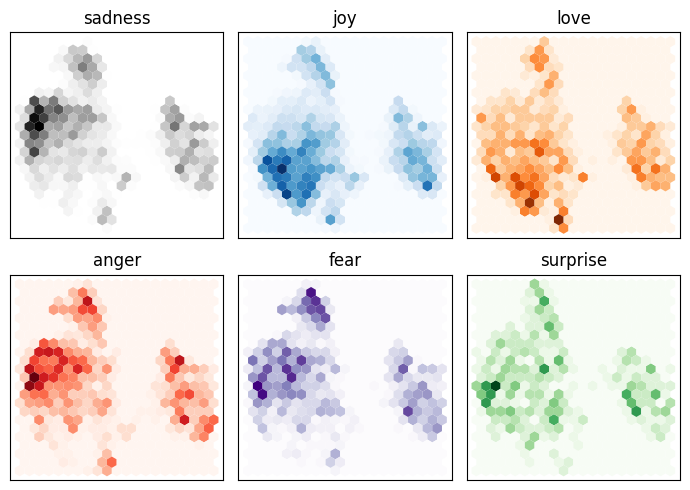

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [50]:
from sklearn.linear_model import LogisticRegression

# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_val, y_val)

0.634

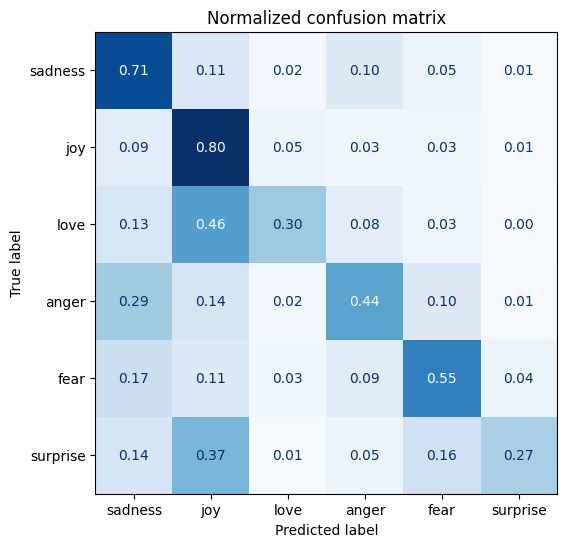

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_val)
plot_confusion_matrix(y_preds, y_val, labels)

## Fine Tunning Transformers

In [52]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels=num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [53]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [54]:
from huggingface_hub import notebook_login
notebook_login()

In [59]:
from transformers import Trainer,TrainingArguments

batch_size = 128
logging_steps = len(emotions['train'])
model_name = f"{model_ckpt}-finetuned-on-emotion-dataset"
training_args = TrainingArguments(output_dir=model_name,num_train_epochs=5,
                                  learning_rate=2e-4,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy='epoch',
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  push_to_hub_model_id="Fine-Tuned-Models",
                                  log_level="error"
                                  )


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1980: FutureWarning: `--push_to_hub_model_id` is deprecated and will be removed in version 5 of 🤗 Transformers. Use `--hub_model_id` instead and pass the full repo name to this argument (in this case thundergod-zenitsu/Fine-Tuned-Models).
  warnings.warn(


In [60]:
trainer = Trainer(model=model,args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded['train'],
                  eval_dataset=emotions_encoded['validation'],
                  tokenizer=tokenizer)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.186362,0.923500,0.924113
2,No log,0.171078,0.928500,0.929058
3,No log,0.132429,0.934500,0.934843
4,No log,0.147152,0.936500,0.935995
5,No log,0.166647,0.939000,0.938892


TrainOutput(global_step=625, training_loss=0.1684654296875, metrics={'train_runtime': 572.0622, 'train_samples_per_second': 139.845, 'train_steps_per_second': 1.093, 'total_flos': 1800857154240000.0, 'train_loss': 0.1684654296875, 'epoch': 5.0})

In [61]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [62]:
preds_output.metrics

{'test_loss': 0.16664673388004303,
 'test_accuracy': 0.939,
 'test_f1': 0.9388918683066417,
 'test_runtime': 4.0249,
 'test_samples_per_second': 496.902,
 'test_steps_per_second': 3.975}

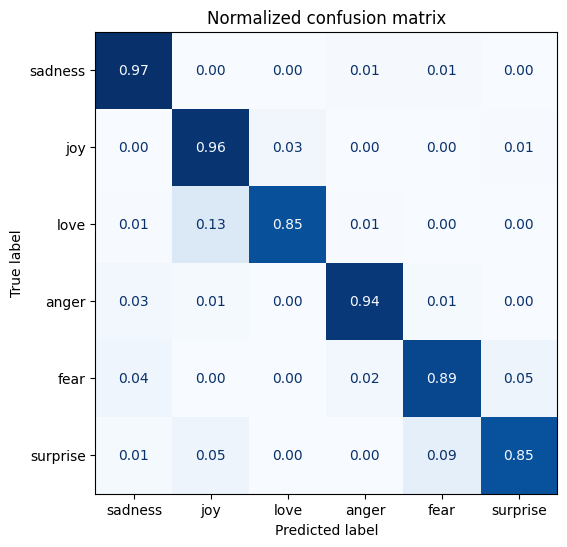

In [63]:
y_preds = np.argmax(preds_output.predictions, axis=1)
plot_confusion_matrix(y_preds, y_val, labels)

In [67]:
trainer.push_to_hub(commit_message="Training completed!")

events.out.tfevents.1722071303.5957d5472333.263.2:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/thundergod-zenitsu/Fine-Tuned-Models/commit/9663d15e2741daf47be2d478c3529c6d78253076', commit_message='Training completed!', commit_description='', oid='9663d15e2741daf47be2d478c3529c6d78253076', pr_url=None, pr_revision=None, pr_num=None)

## Using the uploaded model on HuggingFace

In [68]:
from transformers import pipeline
model_id = "thundergod-zenitsu/Fine-Tuned-Models"
emotion_classifier = pipeline("text-classification",model=model_id)

In [69]:
custom_tweet = "I've been waiting for a HuggingFace course my whole life."
preds = emotion_classifier(custom_tweet,return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


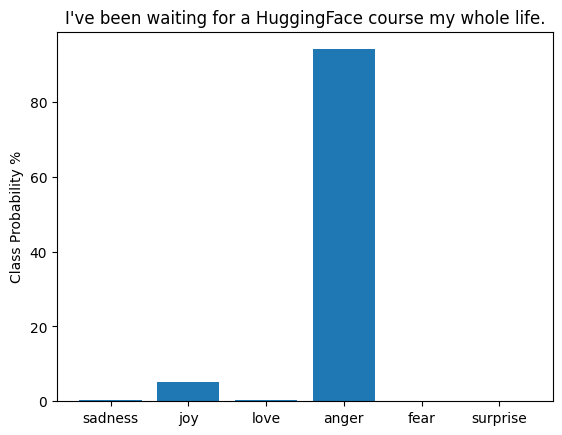

In [71]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels,100 * preds_df['score'],color='C0')
plt.title(f"{custom_tweet}")
plt.ylabel("Class Probability %")
plt.show()